In [25]:
# Chapter 1 - Text Analytics in Python #
import nltk
import spacy
import numpy as np
import pandas as pd
import os
from spacy import displacy
from nltk.parse.stanford import StanfordParser

path_to_gs = "C:/Program Files (x86)/gs/gs9.52/bin"
os.environ['PATH'] += os.pathsep + path_to_gs
print("DONE!")

DONE!


In [4]:
#following line is optional for custom vocabulary installation (pg. 12)
# you can use nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm', parse = True, tag = True, entity = True)
print(nlp.vocab.length)

57852


In [11]:
#Shuffling words in a sentence (pg. 13)
sentence = "The brown fox is quick and he is jumping over the lazy dog"
sentence
words = sentence.split()
np.random.shuffle(words)
print(words)

['jumping', 'is', 'he', 'and', 'dog', 'brown', 'lazy', 'the', 'The', 'is', 'quick', 'over', 'fox']


In [6]:
#Tagging words with POS (pg. 16)
pos_tags = nltk.pos_tag(sentence.split())
pd.DataFrame(pos_tags).T

spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in nlp(sentence)]
pd.DataFrame(spacy_pos_tagged).T 
#spacy works better than nltk (has 3 rows instead of 2 and gives better description of POS)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
1,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,IN,DT,JJ,NN
2,DET,ADJ,NOUN,VERB,ADJ,CCONJ,PRON,VERB,VERB,ADP,DET,ADJ,NOUN


(S
  (NP The/DT brown/JJ fox/NN)
  (VP is/VBZ)
  (ADJP quick/JJ)
  and/CC
  he/PRP
  (VP is/VBZ jumping/VBG)
  (PP over/IN)
  (NP the/DT lazy/JJ dog/NN))


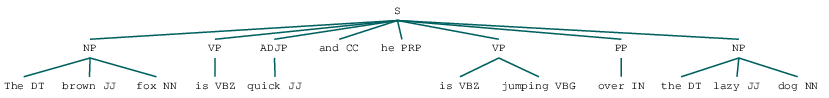

In [7]:
#Shallow parsing using NLTK (pg. 19-20)
grammar = '''
            NP: {<DT>?<JJ>?<NN.*>}
            ADJP: {<JJ>}
            ADVP: {<RB.*>}
            PP: {<IN>}
            VP: {<MD>?<VB.*>+}
          '''
pos_tagged_sent = nltk.pos_tag(sentence.split())
rp = nltk.RegexpParser(grammar)
shallow_parsed_sent = rp.parse(pos_tagged_sent)
print(shallow_parsed_sent)

#visualize the shallow parse tree
shallow_parsed_sent

In [20]:
#Dependency grammar visualization (pg. 26)
#nlp=spacy.load('en_core_web_sm')
#doc = nlp(u'Rats are various medium-sized, long-tailed rodents')
#displacy.render(doc, jupyter=True, style='dep', options={'distance': 60})

sentence = 'The brown fox is quick and is jumping over the lazy dog.'
doc = nlp(sentence)

displacy.render(doc, jupyter=True, options={'distance': 100,
                                            'arrow_stroke': .5,
                                            'arrow_width': 4})


In [24]:
#Visualizing a constituency tree
scp = StanfordParser(path_to_jar='E:/stanford/stanford-parser-full-2015-04-20/stanford-parser-3.5.2-models.jar', path_to_models_jar='E:/stanford/stanford-parser-full-2015-04-20/stanford-parser-3.5.2-models.jar')
result = list(scp.raw_parse(sentence))
print(result[0])

C:\Users\trevo.DESKTOP-Q3G2N9L\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  


LookupError: Could not find stanford-parser\.jar jar file at E:/stanford/stanford-parser-full-2015-04-20/stanford-parser-3.5.2-models.jar

In [34]:
#load Brown corpus (pg. 56-58)
from nltk.corpus import brown

#total catgories
print('Total Categories:', len(brown.categories()))

#print the categories
print(brown.categories())

#tokenized sentences
brown.sents(categories='mystery')

#POS tagged sentences
brown.tagged_sents(categories='mystery')

#get sentences in natural form
sentences = brown.sents(categories='mystery')
sentences = [' '.join(sentence_token) for sentence_token in sentences]
sentences[0:5] #viewing first 5 sentences

#get tagged words
tagged_words = brown.tagged_words(categories='mystery')

#get nouns from tagged words
nouns = [(word, tag) for word, tag in tagged_words if any(noun_tag in tag for noun_tag in 
                                                         ['NP', 'NN'])]
nouns[0:10] #view first 10 nouns

#build frequency distribution for nouns
nouns_freq = nltk.FreqDist([word for word, tag in nouns])

#view top 10 occurring nouns
nouns_freq.most_common(10)

Total Categories: 15
['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


[('man', 106),
 ('time', 82),
 ('door', 80),
 ('car', 69),
 ('room', 65),
 ('Mr.', 63),
 ('way', 61),
 ('office', 50),
 ('eyes', 48),
 ('hand', 46)]

In [39]:
#load Reuters corpus (pg. 59-60)
from nltk.corpus import reuters

#total categories
print('Total Categories:', len(reuters.categories()))

#print the categories
print(reuters.categories())

#get sentences in housing and income categories
sentences = reuters.sents(categories=['housing', 'income'])
sentences = [' '.join(sentence_tokens) for sentence_tokens in sentences]
sentences[0:5] #view first 5 sentences

#fileid based access
print(reuters.fileids(categories=['housing', 'income']))

print(reuters.sents(fileids=[u'test/16118', u'test/18534']))

Total Categories: 90
['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']
['test/16118', 'test/18534', 'test/18540', 'test/18664', 'test/18665'

In [45]:
#load the Wordnet Corpus (pg. 61)
from nltk.corpus import wordnet as wn

word = 'hike' #taking hike as our word of interest
# get word synsets
word_synsets = wn.synsets(word)
word_synsets

# get details for each synonym in synset
for synset in word_synsets:
    print(('Synset Name: {name}\n'
           'POS Tag: {tag}\n'
           'Definition: {defn}\n'
           'Examples: {ex}\n').format(name=synset.name(),
                                      tag=synset.pos(),
                                      defn=synset.definition(),
                                      ex=synset.examples()))

Synset Name: sock.n.01
POS Tag: n
Definition: hosiery consisting of a cloth covering for the foot; worn inside the shoe; reaches to between the ankle and the knee
Examples: []

Synset Name: windsock.n.01
POS Tag: n
Definition: a truncated cloth cone mounted on a mast; used (e.g., at airports) to show the direction of the wind
Examples: []

Synset Name: sock.v.01
POS Tag: v
Definition: hit hard
Examples: []

